In [1]:
#機械学習帳Chap4
#Reference:https://chokkan.github.io/mlnote/regression/04sgd.html

In [2]:
include("../src/method_parameter.jl")
include("../src/linear_regression.jl")
include("../src/ridge_regression.jl")
using LinearAlgebra
using Printf
using Plots

In [3]:
# 線形回帰分析
let
    # data
    xs = [1, 3, 6, 8]
    ys = [3, 6, 5, 7]
    X = [x^j for x in xs, j = 0:1]
    X_T = transpose(X)
    
    ϵ = 1e-4
    vabs(grad) = sum(abs.(grad))
    
    # 最急降下法による推定
    ηconst(t) = 0.001 #学習率は固定
    w_gd = linear_regression(X, ys, GD(zeros(2), t->0.001, 1e-4, 10_000))
    println("GD :W=$w_gd")
    
    # 最小二乗法による推定
    w_ols = linear_regression(X, ys, OLS())
    println("OLS:W=$w_ols")
    
    # 確率的勾配降下法による推定
    w_sgd = linear_regression(X, ys, SGD(zeros(2), t->0.03/sqrt(1+t), 1e-4, 40_000))
    println("SGD:W=$w_sgd")
end

GD :W=[3.310303082536587, 0.4310413781314173]
OLS:W=[3.310344827586208, 0.43103448275862055]
SGD:W=[3.315006777090238, 0.42617861571208965]


 (SGD) w=[0.4192545646203452, 2.2384065120535372, -4.113852253752675, -2.735718616113024, -0.7300177193629767, 0.6268206272321373, 1.2831425842940019, 1.409600931397837, 1.1786244445146483, 0.7235637479546235]
 (OLS) w=[0.144365324207931, 5.926088060684052, -11.524269753211659, -4.076047682531812, 2.258765507966641, 4.794332308291377, 4.49458100986269, 2.4737527970865623, -0.48331679000892624, -3.8798975829642934]


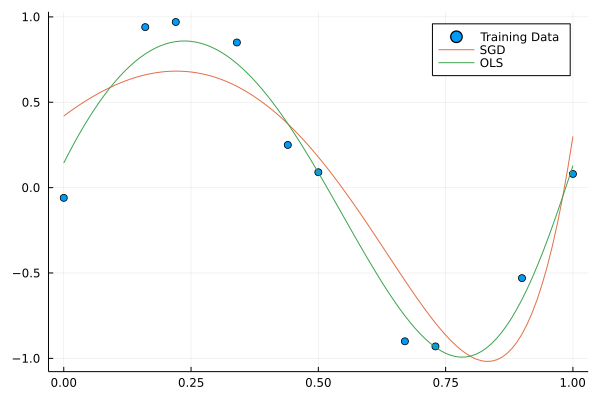

In [4]:
# リッジ回帰
let
    xs = [ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ]
    ys = [-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08]
    α = 10^(-3)
    Dim = 9
    X = [x^j for x in xs, j = (0:Dim)]

    #確率的勾配降下法
    w_sgd = ridge_regression(X, ys, α, SGD(zeros(Dim+1), t->1/sqrt(1+t), 1e-4, 50_000))
    println(" (SGD) w=$w_sgd")
    
    #最小二乗法
    w_ols = ridge_regression(X, ys, α, OLS())
    println(" (OLS) w=$w_ols")
    
    #グラフ描画
    scatter(xs, ys, label="Training Data")
    f(x,w) = sum([x^(j-1) * w[j] for j = (1:length(w))])
    plot!((0.0:0.01:1.0), x->f(x,w_sgd), label="SGD")
    plot!((0.0:0.01:1.0), x->f(x,w_ols), label="OLS")
end